In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
df = pd.read_csv('BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [ ]:
# Fill missing values with the mean of the 'rm' column
df['rm'].fillna(df['rm'].mean(), inplace=True)
df.isnull().sum()

<ipython-input-4-7bf76e097bb4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rm'].fillna(df['rm'].mean(), inplace=True)


,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


             crim        zn     indus      chas  ...   ptratio         b     lstat      medv
crim     1.000000 -0.200469  0.406583 -0.055892  ...  0.289946 -0.385064  0.455621 -0.388305
zn      -0.200469  1.000000 -0.533828 -0.042697  ... -0.391679  0.175520 -0.412995  0.360445
indus    0.406583 -0.533828  1.000000  0.062938  ...  0.383248 -0.356977  0.603800 -0.483725
chas    -0.055892 -0.042697  0.062938  1.000000  ... -0.121515  0.048788 -0.053929  0.175260
nox      0.420972 -0.516604  0.763651  0.091203  ...  0.188933 -0.380051  0.590879 -0.427321
rm      -0.219247  0.311991 -0.391676  0.091251  ... -0.355501  0.128069 -0.613808  0.695360
age      0.352734 -0.569537  0.644779  0.086518  ...  0.261515 -0.273534  0.602339 -0.376955
dis     -0.379670  0.664408 -0.708027 -0.099176  ... -0.232471  0.291512 -0.496996  0.249929
rad      0.625505 -0.311948  0.595129 -0.007368  ...  0.464741 -0.444413  0.488676 -0.381626
tax      0.582764 -0.314563  0.720760 -0.035587  ...  0.460853 -0.4418

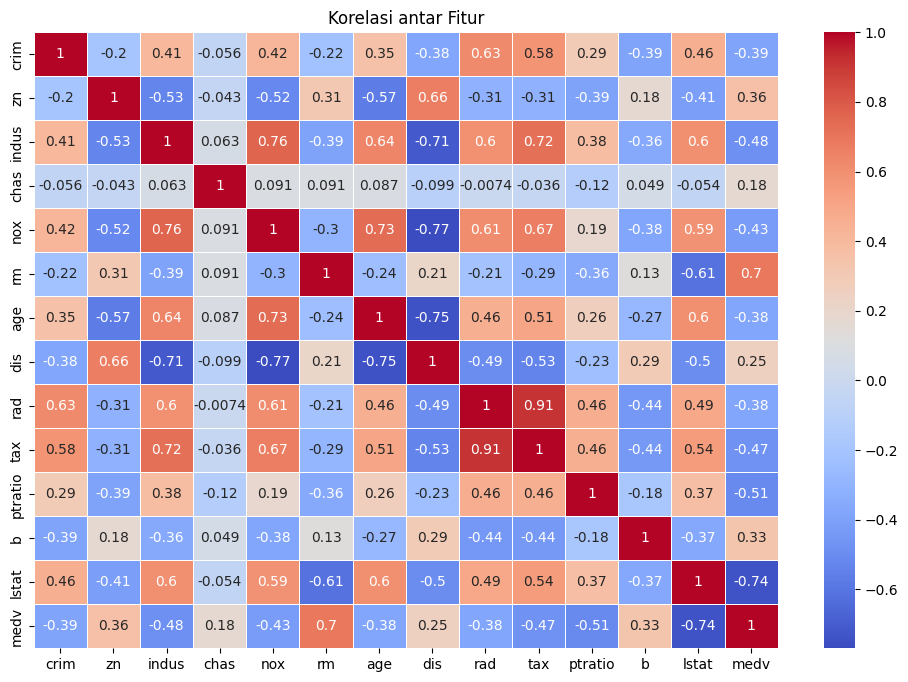

In [ ]:
correlation_matrix = df.corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Korelasi antar Fitur")
print(correlation_matrix)
plt.show()

In [ ]:
# Pilih fitur dan target
x = df.drop('medv', axis=1)
y = df['medv']

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Membangun model random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model pada data latih
model.fit(X_train, y_train)

# Evaluasi model pada data uji
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Validasi model menggunakan cross-validation
cv_scores = cross_val_score(model, x, y, cv=5)
print(f'Cross-Validation Mean Squared Error: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores)}')

Mean Squared Error: 7.832490843137255
R-squared: 0.8931939618332004
Cross-Validation Mean Squared Error: [0.77245527 0.8574746  0.74177033 0.46959114 0.29475494]
Mean CV Score: 0.6272092569951401


<ipython-input-9-a0654751e415>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


    Feature  Importance
5        rm    0.503816
12    lstat    0.309498
7       dis    0.060416
0      crim    0.038096
10  ptratio    0.015991
9       tax    0.015683
4       nox    0.015556
6       age    0.013826
11        b    0.012530
2     indus    0.007918
8       rad    0.003812
1        zn    0.001757
3      chas    0.001103


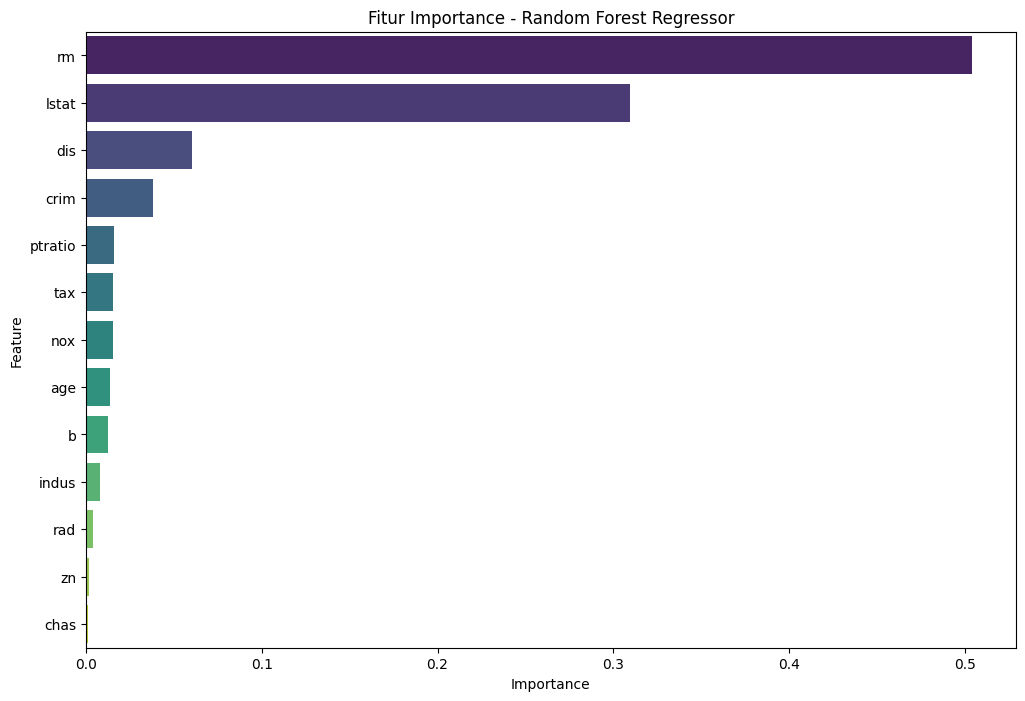

In [ ]:
# Mengambil fitur importance dari model
feature_importance = model.feature_importances_

# Membuat DataFrame untuk memudahkan visualisasi
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})

# Mengurutkan DataFrame berdasarkan fitur importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan bar plot dari fitur importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Fitur Importance - Random Forest Regressor')
print(feature_importance_df)
plt.show()